# From Statistical Physics to Data-Driven Modelling with Applications to Quantitative Biology
 
Tutorial 3:replay of neural activity during sleep following task learning.  

This tutorial is based on the works: 

-Replay of rule-learning related neural patterns in the prefrontal cortex during sleep, A. Peyrache, K. Benchenane, M. Khamassi, S. I. Wiener, F. P. Battaglia, Nature Neuroscience, DOI:10.1038/nn.2337 (2009).  
-Principal component analysis of ensemble recordings reveals cell assemblies at high temporal resolution, A. Peyrache , K. Benchenane, M. Khamassi, S. I. Wiener, F. P. Battaglia, Journal of Computational Neuroscience, DOI:10.1007/s10827-009-0154-6 (2009).

Starting Notebook SC, RM, FZ

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

from scipy.sparse import coo_matrix
import numpy.matlib
from numpy import linalg as LA


#%matplotlib inline
#plt.rcParams["font.family"] = "serif"
#plt.rcParams["mathtext.fontset"] = "dejavuserif"
#plt.rcParams["figure.figsize"] = (10, 8)
#plt.rcParams["font.size"] = 26

Import data

In [3]:
data1=np.loadtxt('./Data/Dati_181014_maze.txt')
datatask=data1.astype(int)
data2=np.loadtxt('./Data/Dati_181014_sleep1.txt')
datapre=data2.astype(int)
data3=np.loadtxt('./Data/Dati_181014_sleep2.txt')
datapost=data3.astype(int)

Question I: Raster Plot for the first 10 seconds of the Activity and for the 37 Neurons

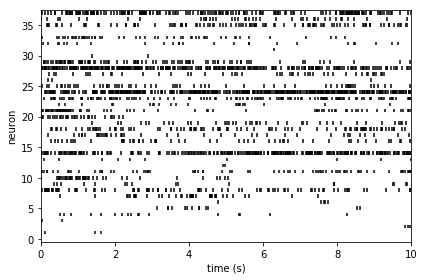

In [12]:
#Question 1: Raster Plot
raster=data1
tmin=np.min(raster[:,0])
tmax=np.max(raster[:,0])
plt.xlim([0,10])
plt.ylim([-0.5,37.5])
plt.vlines((raster[:,0]-tmin)/10000,raster[:,1]-0.3,raster[:,1]+0.3)
plt.xlabel('time (s)')
plt.ylabel('neuron')
#plt.title('Raster plot')
plt.tight_layout()
#plt.savefig('raster_task_dt01t1sec.pdf')
plt.show()


Question 2: Functions to extract from data the neural activity matrix and the zscore matrix.

In [24]:
#Function smat: LxM activity matrix from the data. Gives the number of spikes at each time bin [n=1..M] for each neuron [i=1...38] 
    #time window of a bin (data are in 0.1 ms) dt=100 ms 
def smat(data):
    dt=1000 
    L=np.amax(data[:,1]).astype(int)
    Ndata=np.size(data,0);
    Tmin=np.amin(data[:,0])
    Tmax=np.amax(data[:,0])
    T=Tmax-Tmin
    M=int(T//dt)+1
    #y bin in which the neuron is active
    y=(data[:,0]-Tmin)/dt
    #x index of active neuron (starting from zero) 
    x=(data[:,1])-1
    z=np.ones(Ndata)
    s_sparse=coo_matrix((z,(x,y)),dtype=np.int8,shape=(L,M))
    s=s_sparse.toarray()
    #Alternative way without using sparse matrices
    #s=np.zeros((L,M),dtype=int)
    #for k in range(len(data)):
    #    s[data[k,1]-1,(data[k,0]-Tmin)//dt]+=1
    return s

In [25]:
#Function Zscore: calculation of z-score from the data
def Zscore(data):
    Tmin=np.amin(data[:,0])
    Tmax=np.amax(data[:,0])
    T=Tmax-Tmin
    M=int(T//dt)+1
    s=smat(data)
    f=np.mean(s,1)
    sigma=np.std(s, axis=1, dtype=np.float64, ddof=1)
    #s.T same as np.transpose(s) 
    #y is a matrix M x L to adapt to the usual data format
    y=(s.T-f)/sigma 
    return y.astype(np.float64)
    #return y



Question 2: Compute Pearson matrix for data and diagonalize it. Compare the spectrum to the Marcenko Pastur distribution to extract the signal components associated to large eigenvalues. 

Question 3: Same as question 2 by reshuffling the spike times  for each neuron.

In [26]:
#Question 3: reshuffling the matrix
Y=Zscore(datatask)
Yshuffle=np.copy(Y)
for i in range(np.size(Y,1)):
    np.random.shuffle(Yshuffle[:,i])



Question 4: Find the neurons that contribute the most to the principal component in the task.

Question 5: Computhe the total replay of the Sleep Pre and Sleep Post epochs.

Question 6: Plot the Reactivation of the first component over time in Sleep Pre and in Sleep Post.

Question 7 (Bonus): Plot the Reactivation of each component as a function of its eigenvalue. Plot the scatter of the reactivations of the components of the Sleep Post and Sleep Pre.